In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [3]:
#Read in the data
df = pd.read_csv('messibetis.csv')

In [5]:
#convert the data to match the mplsoccer statsbomb pitch
#to see how to create the pitch, watch the video here: https://www.youtube.com/watch?v=55k1mCRyd2k
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [6]:
df

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,72.00,32.00,Pass,Successful,57.60,27.52
1,messi,45,25,90.72,30.72,Pass,Successful,108.00,53.12
2,messi,46,4,106.56,37.12,Pass,Successful,102.24,41.60
3,messi,46,7,109.44,43.52,Pass,Successful,136.80,49.92
4,messi,46,55,144.00,0.64,Pass,Unsuccessful,138.24,24.32
5,messi,47,42,105.12,16.00,Pass,Successful,100.80,34.56
6,messi,49,47,108.00,27.52,Pass,Unsuccessful,118.08,24.32
7,messi,50,10,113.76,19.84,Pass,Successful,125.28,15.36
8,messi,50,17,118.08,33.28,Pass,Successful,133.92,43.52
9,messi,50,24,141.12,39.68,Pass,Unsuccessful,141.12,39.04


/home/ikmz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Messi Pass Map vs Real Betis')

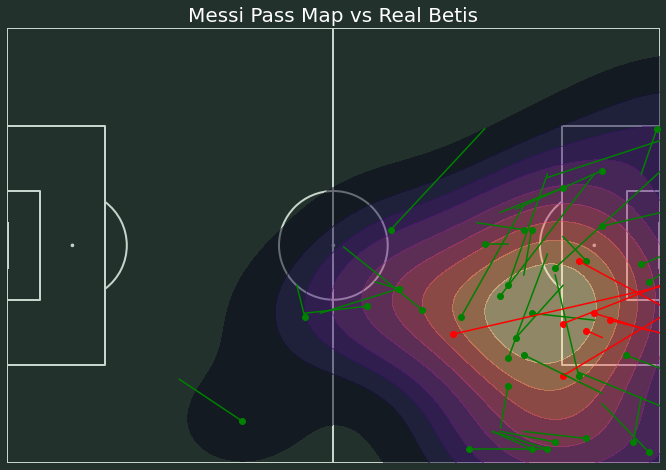

In [17]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# create heat map
kde = sns.kdeplot(
  df['x'],
  df['y'],
  shade = True,
  shade_lowest=False,
  alpha=.5, #backgroudを透明にする
  n_levels=10,#??
  cmap= 'magma'#ここでheatmapの色を変える
)

plt.xlim(0,120)
plt.ylim(0,80)

#use a for loop to plot each pass
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')

plt.title('Messi Pass Map vs Real Betis',color='white',size=20)